# Stars or Storyline: How Actor Fame and Sentiment Trajectories Shape a Movie's Critical Success

# 0. Introduction

In the world of cinema, the question of what makes a movie successful remains complex and multi-faceted. Is it the star power of its cast, or does a captivating storyline hold more sway over an audience’s perception? Our project seeks to dissect these influences to understand what contributes more to a movie's critical success. We believe that the key elements lie in both the fame of the actors involved and the emotional journey crafted within the plot. What factors influence the most to predict the success of a movie?

Our approach explores two primary factors: actor fame and the sentiment trajectory of the movie plot. Using sentiment analysis on plot summaries, we examine the emotional arc of each story, uncovering patterns in tone and intensity. In parallel, we perform social network analysis to evaluate the influence of an actor’s connections and prominence within the industry.

In this results notebook, we showcase the different methods considered, the results obtained, the reasoning behind each decision, and additional reflections. Each section highlights our approach, the key insights derived, and the practical choices made along the way. This notebook consolidates our main findings, while the core logic is implemented in external scripts that we call from here.

Our ultimate goal is to provide a nuanced perspective on the elements that contribute to a movie’s success, examining whether a compelling emotional arc or the presence of influential actors holds more weight in capturing an audience’s approval.



# 1. Data Cleaning and Preprocessing

### 1.1 Clean the Datasets

In [63]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Import the cleaning functions from cleaning.py located in 'tests/Data Cleaning and Preprocessing'
from tests.Data_Cleaning_and_Preprocessing.cleaning import (
    clean_tvtropes_clusters,
    clean_name_clusters,
    clean_character_metadata,
    clean_plot_summaries,
    clean_movie_metadata
)

# Define the data directory
data_directory = os.path.join(os.getcwd(), 'src', 'data')

# Call each cleaning function and save the cleaned data as DataFrames
tvtropes_df = clean_tvtropes_clusters(data_directory)
name_clusters_df = clean_name_clusters(data_directory)
character_metadata_df = clean_character_metadata(data_directory)
plot_summaries_df = clean_plot_summaries(data_directory)
movie_metadata_df = clean_movie_metadata(data_directory)

# Display the first few rows of each DataFrame to verify cleaning
print("TV Tropes Clusters:")
display(tvtropes_df.head())

print("Name Clusters:")
display(name_clusters_df.head())

print("Character Metadata:")
display(character_metadata_df.head())

print("Plot Summaries:")
display(plot_summaries_df.head())

print("Movie Metadata:")
display(movie_metadata_df.head())


# Save the cleaned DataFrames to CSV files in the main 'data' directory with error handling for encoding
tvtropes_df.to_csv(os.path.join('data', 'tvtropes_cleaned.csv'), index=False, encoding='utf-8', errors='replace')
name_clusters_df.to_csv(os.path.join('data', 'name_clusters_cleaned.csv'), index=False, encoding='utf-8', errors='replace')
character_metadata_df.to_csv(os.path.join('data', 'character_metadata_cleaned.csv'), index=False, encoding='utf-8', errors='replace')
plot_summaries_df.to_csv(os.path.join('data', 'plot_summaries_cleaned.csv'), index=False, encoding='utf-8', errors='replace')
movie_metadata_df.to_csv(os.path.join('data', 'movie_metadata_cleaned.csv'), index=False, encoding='utf-8', errors='replace')



TV Tropes Clusters:


trope_name                  character        movie  \
0  absent_minded_professor  Professor Philip Brainard      Flubber   
1  absent_minded_professor         Professor Keenbean  Richie Rich   
2  absent_minded_professor         Dr. Reinhardt Lane   The Shadow   
3  absent_minded_professor         Dr. Harold Medford        Them!   
4  absent_minded_professor             Daniel Jackson     Stargate   

     movie_id            actor  
0   /m/0jy9q0   Robin Williams  
1  /m/02vchl3  Michael McShane  
2   /m/0k6fkc     Ian McKellen  
3   /m/0k6_br     Edmund Gwenn  
4   /m/0k3rhh     James Spader

Name Clusters:


name cluster_id
0  Stuart Little  /m/0k3w9c
1  Stuart Little  /m/0k3wcx
2  Stuart Little  /m/0k3wbn
3       John Doe  /m/0jyg35
4       John Doe  /m/0k2_zn

Character Metadata:


movie_id freebase_id release_date              character_name   actor_dob  \
0   975900   /m/03vyhn   2001-08-24                    Akooshay  1958-08-26   
1   975900   /m/03vyhn   2001-08-24  Lieutenant Melanie Ballard  1974-08-15   
2   975900   /m/03vyhn   2001-08-24         Desolation Williams  1969-06-15   
3   975900   /m/03vyhn   2001-08-24          Sgt Jericho Butler  1967-09-12   
4   975900   /m/03vyhn   2001-08-24             Bashira Kincaid  1977-09-25   

  actor_gender  actor_height actor_ethnicity          actor_name  actor_age  \
0            F         1.620             NaN      Wanda De Jesus       42.0   
1            F         1.780      /m/044038p  Natasha Henstridge       27.0   
2            M         1.727         /m/0x67            Ice Cube       32.0   
3            M         1.750             NaN       Jason Statham       33.0   
4            F         1.650             NaN         Clea DuVall       23.0   

               freebase_character_map  
0  /m/0bgchxw, /m/0bgcj3x, /m/03wcfv7  
1    /m/0jys3m, /m/0bgchn4, /m/0346l4  
2   /m/0jys3g, /m/0bgchn_, /m/01vw26l  
3   /m/02vchl6, /m/0bgchnq, /m/034hyc  
4   /m/02vbb3r, /m/0bgchp9, /m/01y9xg

Plot Summaries:


movie_id                                       plot_summary
0  23890098  Shlykov, a hard-working taxi driver and Lyosha...
1  31186339  The nation of Panem consists of a wealthy Capi...
2  20663735  Poovalli Induchoodan  is sentenced for six yea...
3   2231378  The Lemon Drop Kid , a New York City swindler,...
4    595909  Seventh-day Adventist Church pastor Michael Ch...

Movie Metadata:


movie_id freebase_id                                         movie_name  \
0    975900   /m/03vyhn                                     Ghosts of Mars   
1   3196793   /m/08yl5d  Getting Away with Murder: The JonBenét Ramsey ...   
2  28463795  /m/0crgdbh                                        Brun bitter   
3   9363483  /m/0285_cd                                   White Of The Eye   
4    261236   /m/01mrr1                                  A Woman in Flames   

  release_date     revenue  runtime                           languages  \
0   2001-08-24  14010832.0     98.0  {"/m/02h40lc": "English Language"}   
1   2000-02-16         NaN     95.0  {"/m/02h40lc": "English Language"}   
2         1988         NaN     83.0  {"/m/05f_3": "Norwegian Language"}   
3         1987         NaN    110.0  {"/m/02h40lc": "English Language"}   
4         1983         NaN    106.0   {"/m/04306rv": "German Language"}   

                                   countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                              genres  \
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...   
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...   
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...   
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...   
4                            {"/m/07s9rl0": "Drama"}   

            countries_clean  \
0  United States of America   
1  United States of America   
2                    Norway   
3            United Kingdom   
4                   Germany   

                                        genres_clean languages_clean  rating  \
0  Thriller, Science Fiction, Horror, Adventure, ...         English     NaN   
1     Mystery, Biographical film, Drama, Crime Drama         English     NaN   
2                               Crime Fiction, Drama       Norwegian     NaN   
3  Thriller, Erotic thriller, Psychological thriller         English     NaN   
4                                              Drama          German     NaN   

   vote_count  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

#### Explanation of Data Cleaning Functions in `cleaning.py`

##### 1. `clean_tvtropes_clusters`
- **Objective**: Clean the `tvtropes.clusters.txt` file.
- **Process**:
  - Parses the `details` field, which contains JSON-like data, to extract key fields such as `character`, `movie`, `movie_id`, and `actor`.
  - Converts this data into a cleaner format by organizing the extracted values into individual columns, making the dataset easier to work with.

##### 2. `clean_name_clusters`
- **Objective**: Clean the `name.clusters.txt` file.
- **Process**:
  - Loads the data and assigns column names (`name`, `cluster_id`) for clarity.
  - Checks for and removes any missing or redundant entries to ensure consistency.

##### 3. `clean_character_metadata`
- **Objective**: Clean the `character.metadata.tsv` file.
- **Process**:
  - Fixes misalignments where rows contain extra `Freebase` character columns, ensuring all rows have consistent structure.
  - Replaces `Unknown` with `NaN` for missing data, and assigns appropriate data types to columns like `actor_height` and `actor_age`.
  - Ensures realistic values in the `actor_age` column by converting negative values to positive and setting a maximum age limit.

##### 4. `clean_plot_summaries`
- **Objective**: Clean the `plot_summaries.txt` file.
- **Process**:
  - Loads the plot summaries dataset, verifies unique `movie_id`s, and checks for duplicates.
  - Prepares the plot summaries for further analysis by ensuring each summary is correctly linked to its respective movie ID.

##### 5. `clean_movie_metadata`
- **Objective**: Clean the `movie.metadata.tsv` file.
- **Process**:
  - Parses fields like `countries`, `genres`, and `languages` to extract human-readable values from dictionary-like entries.
  - Handles missing values for key columns such as `release_date`, `revenue`, and `runtime`.
  - Generates cleaned versions of `languages`, `countries`, and `genres` columns, creating a standardized format.


### 1.2 Adding Ratings

### 1.3 Adding missing Data


### 1.4 Master Dataset

# 2. Metric Selection and Preliminary Analysis

### 2.1 Definition of Sucess

To conduct any meaningful analysis of success, it’s crucial to first define what “success” actually means in the given context. Success is a multifaceted concept that can vary widely depending on goals, stakeholders, and industry standards. Without a clear definition, it’s challenging to identify the factors that contribute to success or measure their impact accurately.

Defining success requires selecting parameters that align with the unique objectives and context of the analysis. In the film industry, for instance, success could be measured by revenue, which speaks to a movie's commercial appeal, or by critical reviews, which reflect its artistic and cultural impact. However, factors like the size of the target audience and the specific market or country also shape these definitions. A blockbuster may achieve global success through widespread appeal and high box office revenue, whereas an independent film might be considered successful if it performs well locally, resonating strongly with a niche audience or in a particular country.

### 2.2 Preliminary Analysis

#### General

Having a comprehensive overview of our datasets is crucial to understanding their scope and dimensions. Visualizing the data can often spark new ideas, raise pertinent questions, and guide the direction of our analysis. By examining the general characteristics and distributions within our datasets, we can identify patterns, anomalies, and potential areas of interest that warrant further investigation. This initial exploration sets the foundation for more detailed and targeted analyses in subsequent sections.

When looking at the data, it is important to keep in mind the evolution of its quantity over time.

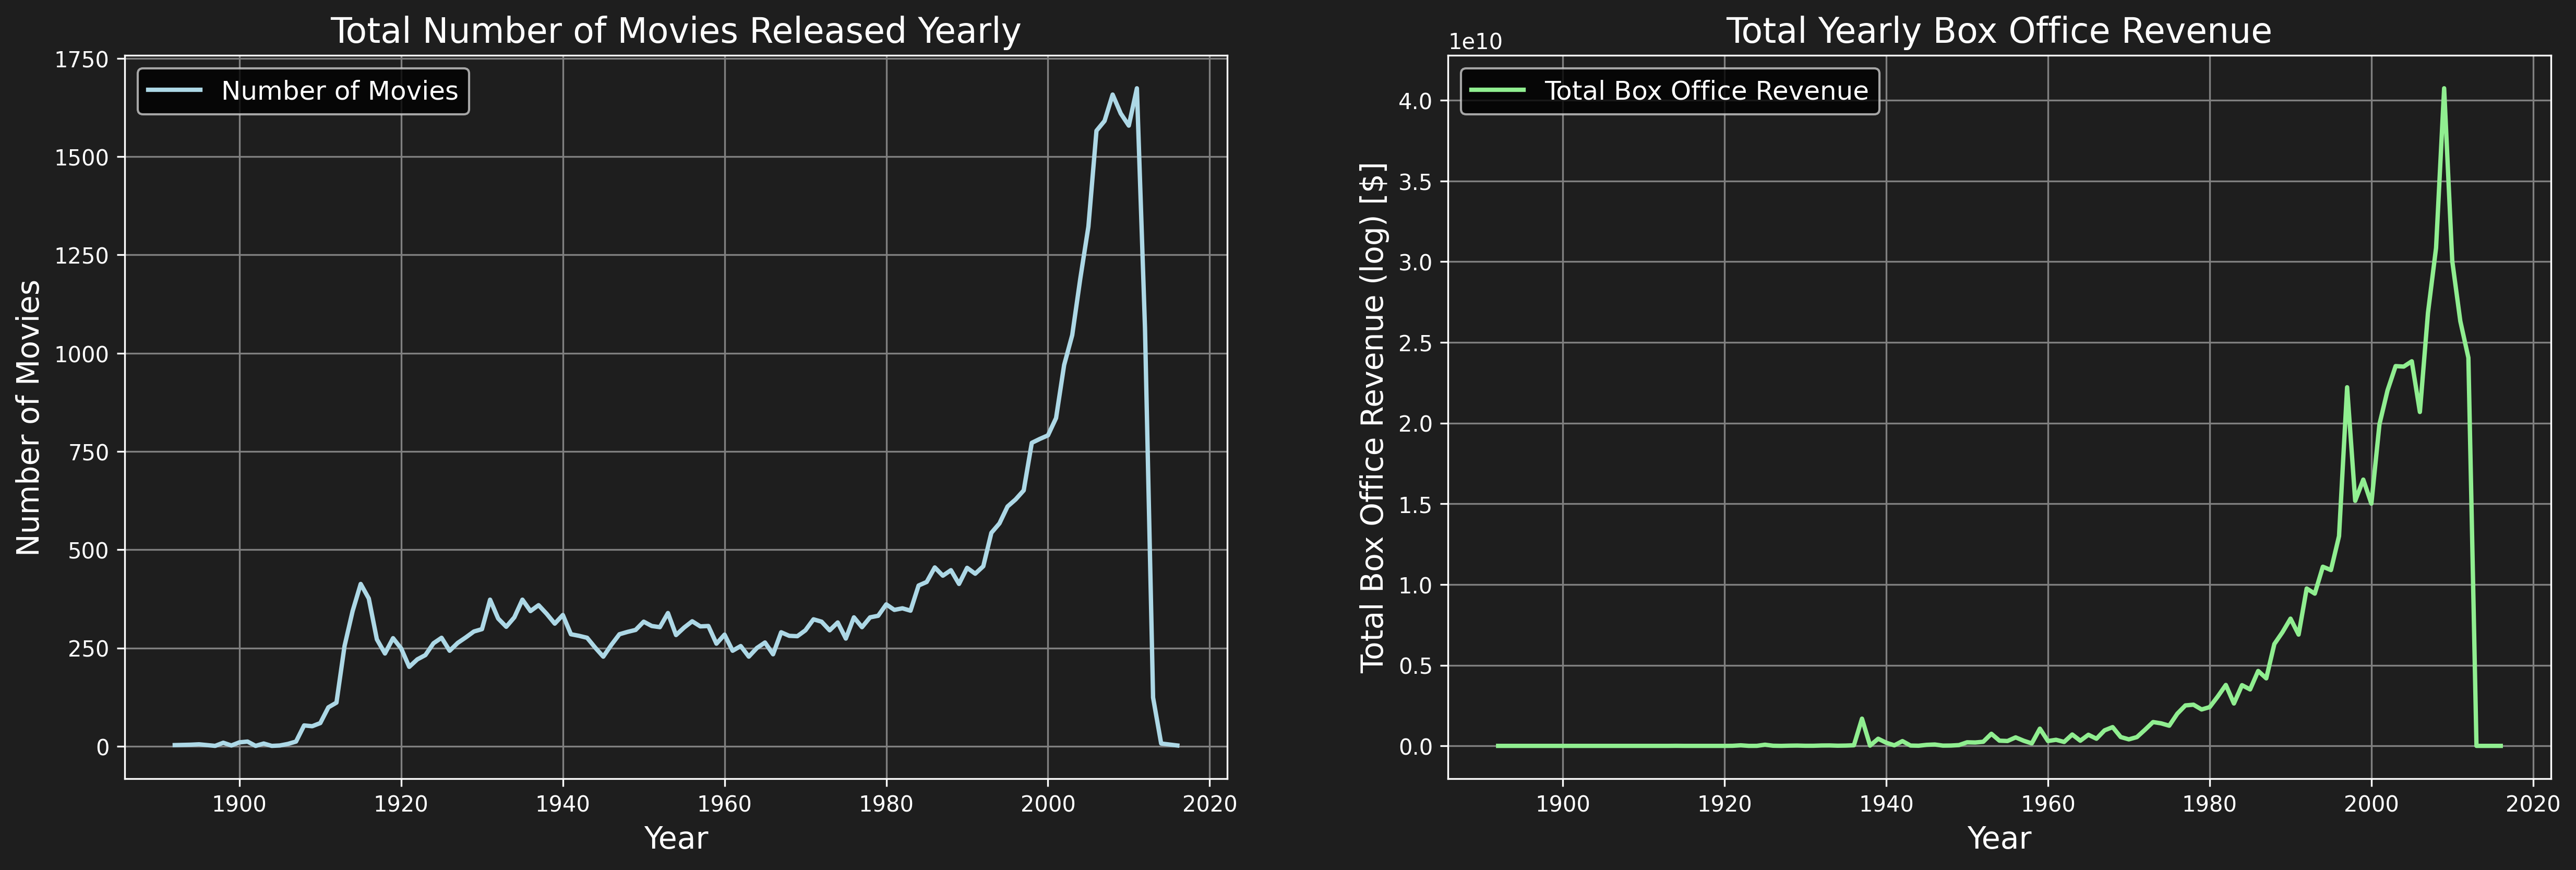

In [64]:
# Ensure the release_date column is in datetime format
movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')

# Extract the year from the release_date column
movie_metadata_df['year'] = movie_metadata_df['release_date'].dt.year

# Group by year and count the number of movies released each year
movies_per_year = movie_metadata_df.groupby('year').size()

# Group by year and sum the total box office revenue per year
total_revenue_per_year = movie_metadata_df.groupby('year')['revenue'].sum()

# Plot the total number of movies released yearly and total yearly box office revenue
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), dpi=300)
fig.patch.set_facecolor(background_color)  # Set the figure background color

# Plot the total number of movies released yearly
ax1.set_facecolor(background_color)  # Set the axes background color
ax1.plot(movies_per_year.index, movies_per_year.values, color='lightblue', linewidth=2, label='Number of Movies')
ax1.set_title('Total Number of Movies Released Yearly', fontsize=16, color='white')
ax1.set_xlabel('Year', fontsize=14, color='white')
ax1.set_ylabel('Number of Movies', fontsize=14, color='white')
#ax1.set_yscale('log')
ax1.grid(True, color='gray')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.legend(loc='upper left', fontsize=12)

# Plot the total yearly box office revenue
ax2.set_facecolor(background_color)  # Set the axes background color
ax2.plot(total_revenue_per_year.index, total_revenue_per_year.values, color='lightgreen', linewidth=2, label='Total Box Office Revenue')
ax2.set_title('Total Yearly Box Office Revenue', fontsize=16, color='white')
ax2.set_xlabel('Year', fontsize=14, color='white')
ax2.set_ylabel('Total Box Office Revenue (log) [$]', fontsize=14, color='white')
#ax2.set_yscale('log')
ax2.grid(True, color='gray')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.legend(loc='upper left', fontsize=12)

plt.show()


We can see the the quantity of data available is directely correlated to the the total quantifications, total yearly box office for example.

In [65]:
# Data preprocessing and analysis
movie_metadata_df['year'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce').dt.year
df_cleaned = movie_metadata_df.dropna(subset=['year', 'revenue'])
df_cleaned['revenue'] = pd.to_numeric(df_cleaned['revenue'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['revenue'])
revenue_stats = df_cleaned.groupby('year')['revenue'].agg(['mean', 'std', 'median', 'min', 'max'])

# Proportion of movies with box office revenue available
total_movies = movie_metadata_df.shape[0]
movies_with_revenue = movie_metadata_df['revenue'].notna().sum()
proportion_with_revenue = movies_with_revenue / total_movies
background_color = '#1e1e1e'

C:\Users\Pierre\AppData\Local\Temp\ipykernel_23072\2921704650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revenue'] = pd.to_numeric(df_cleaned['revenue'], errors='coerce')


### Ratings

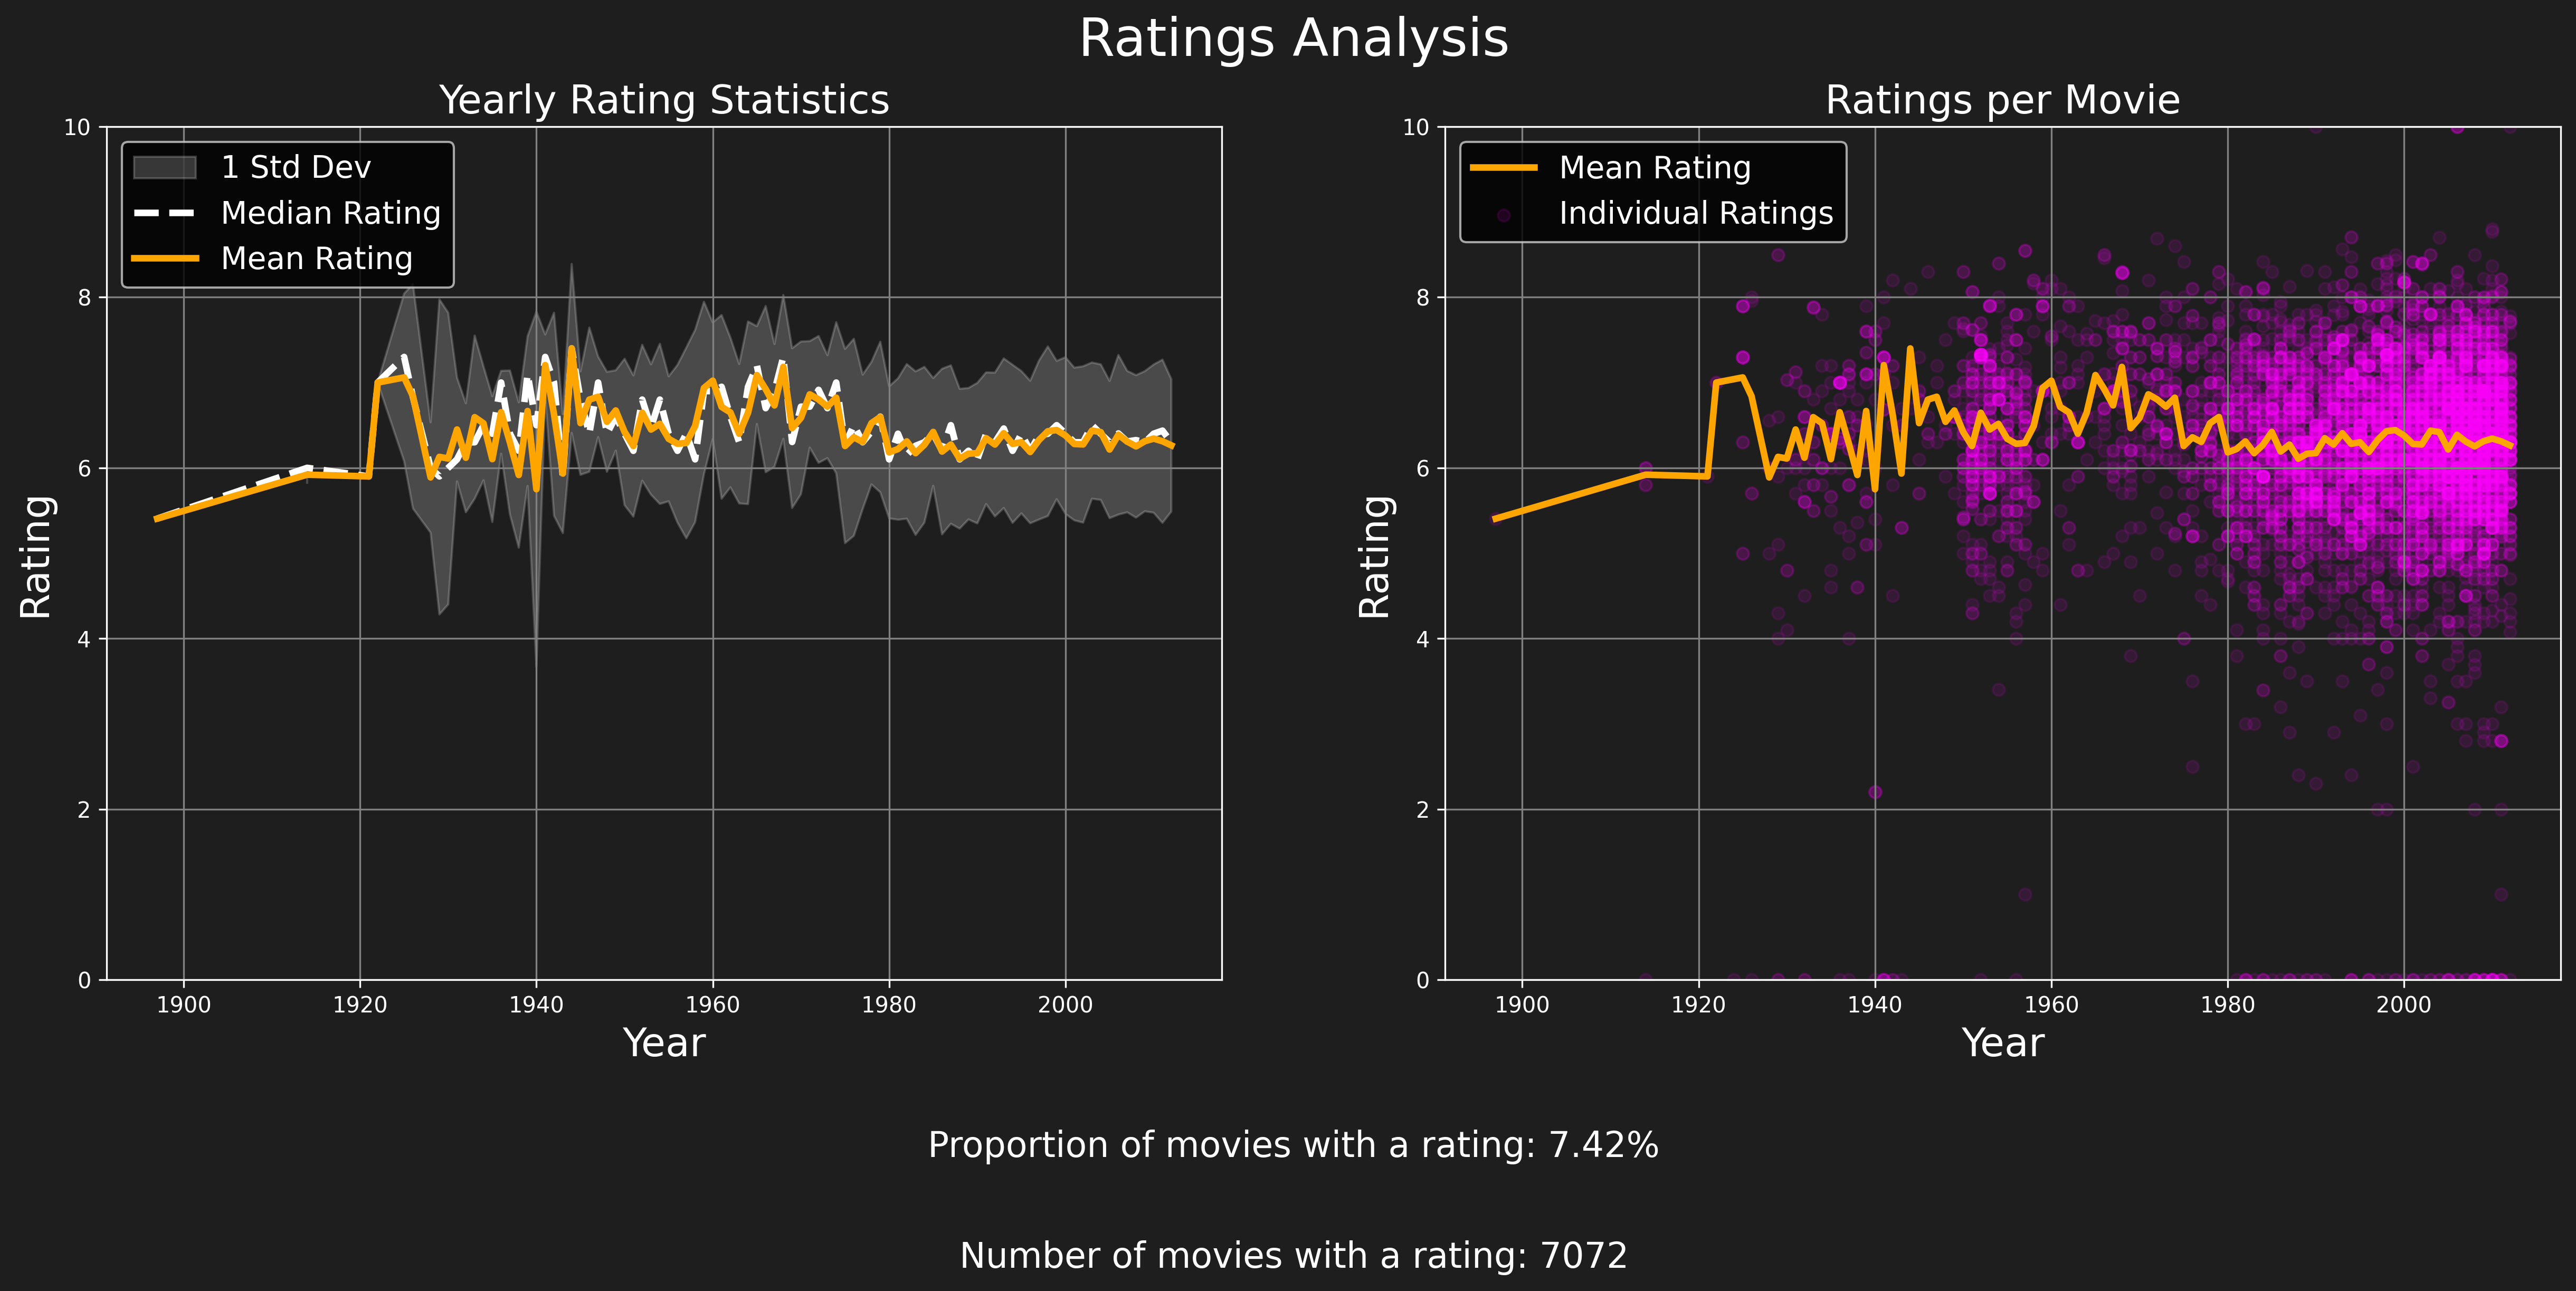

In [66]:
# Set the dark mode style
#plt.style.use('dark_background')

# Ensure the release_date column is in datetime format
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')
# Filter out movies with 0 vote_count
df_filtered_votes = df_cleaned[df_cleaned['vote_count'] > 0]

# Group by year and calculate the statistics for ratings
rating_stats = df_filtered_ratings.groupby(df_filtered_ratings['release_date'].dt.year)['rating'].agg(['mean', 'median', 'std', 'min', 'max'])



# Group by year and calculate the statistics for vote_count
vote_count_stats = df_filtered_votes.groupby(df_filtered_votes['release_date'].dt.year)['vote_count'].agg(['mean', 'median', 'std', 'min', 'max'])

# Calculate the mean, median, std, min, and max ratings for each year

# Define the background color similar to VSCode's dark theme
background_color = '#1e1e1e'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), dpi=300)
fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)

# Main title
fig.suptitle('Ratings Analysis', fontsize=24, color='white')

# Plot 1
axes[0].fill_between(rating_stats.index, rating_stats['mean'] - rating_stats['std'],
                     rating_stats['mean'] + rating_stats['std'], color='white', alpha=0.2, label='1 Std Dev')
axes[0].plot(rating_stats.index, rating_stats['median'], label='Median Rating', linestyle='--', color='white', linewidth=3)
axes[0].plot(rating_stats.index, rating_stats['mean'], label='Mean Rating', color='orange', linewidth=3)
axes[0].set_title('Yearly Rating Statistics', fontsize=18, color='white')
axes[0].set_xlabel('Year', fontsize=18, color='white')
axes[0].set_ylabel('Rating', fontsize=18, color='white')
axes[0].legend(fontsize=14, loc='upper left')
axes[0].grid(True, color='gray')
axes[0].set_ylim(0, 10)  # Set y-axis limits

# Plot 2
axes[1].plot(rating_stats.index, rating_stats['mean'], label='Mean Rating', color='orange', linewidth=3)
axes[1].scatter(df_cleaned['year'], df_cleaned['rating'], color='magenta', alpha=0.1, label='Individual Ratings', s=30)
axes[1].set_title('Ratings per Movie', fontsize=18, color='white')
axes[1].set_xlabel('Year', fontsize=18, color='white')
axes[1].set_ylabel('Rating', fontsize=18, color='white')
axes[1].legend(fontsize=14, loc='upper left')
axes[1].grid(True, color='gray')
axes[1].set_ylim(0, 10)  # Set y-axis limits

# Set tick parameters
for ax in axes:
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

num_movies_plotted = len(df_filtered_votes)
proportion_with_rating = num_movies_plotted / total_movies
plt.figtext(0.5, -0.05, f"Proportion of movies with a rating: {proportion_with_rating:.2%}", ha='center', fontsize=16, color='white')
plt.figtext(0.5, -0.15, f"Number of movies with a rating: {num_movies_plotted}", ha='center', fontsize=16, color='white')

plt.show()


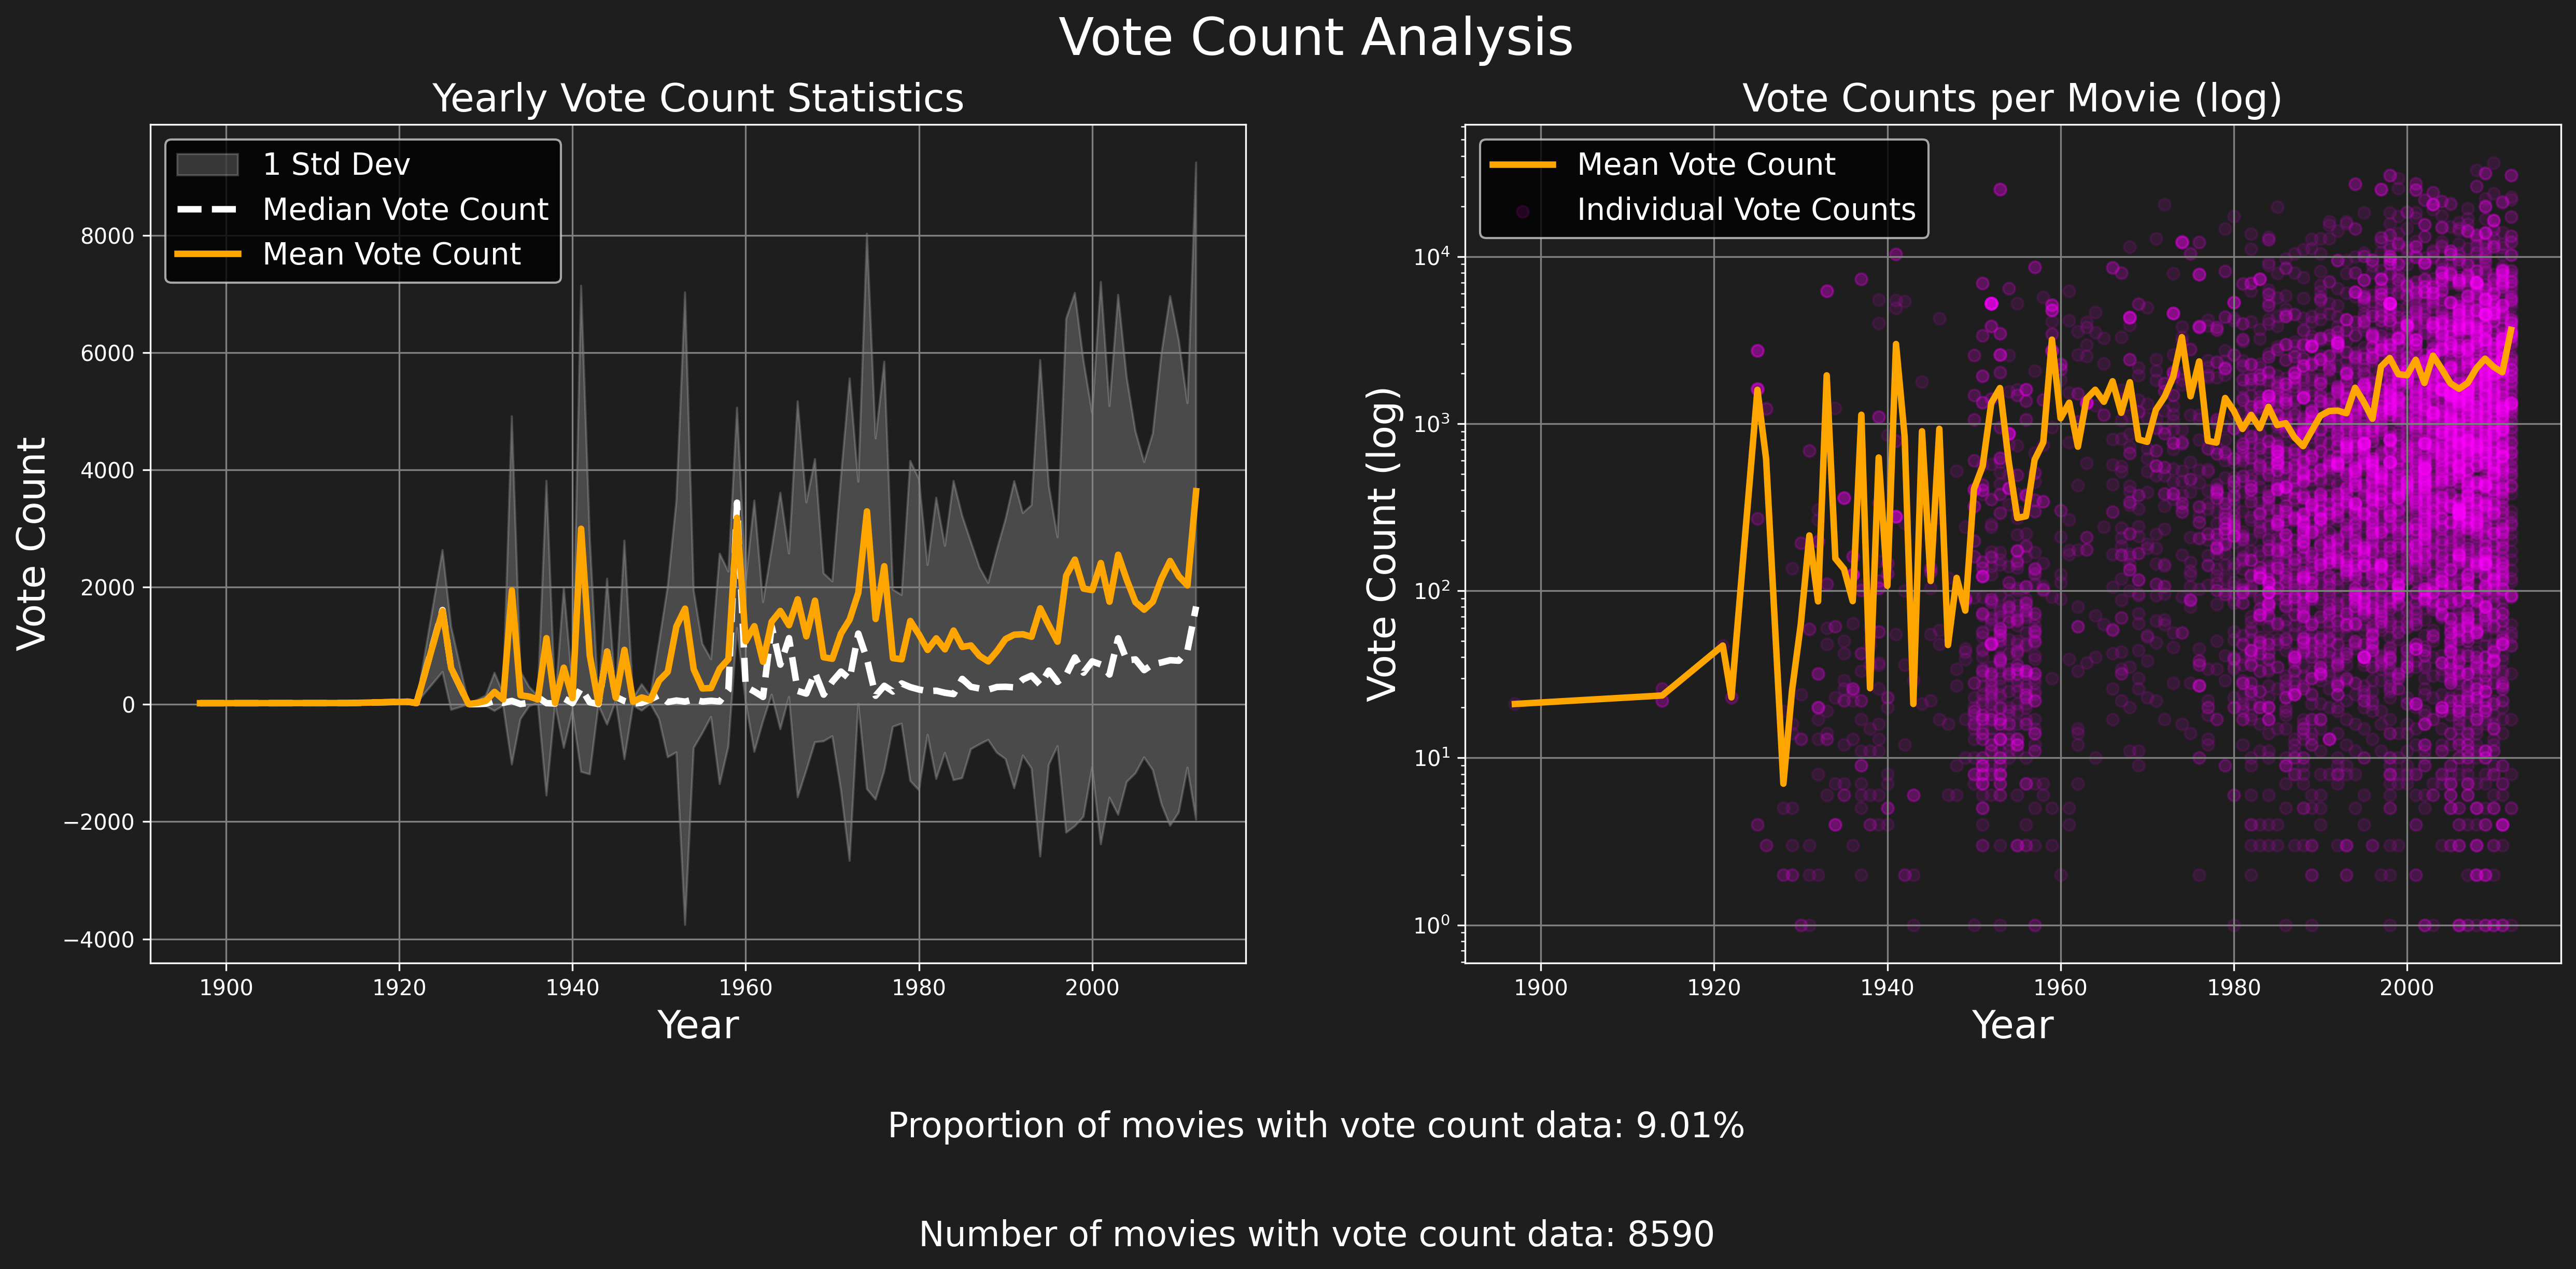

In [67]:
# Set the dark mode style
#plt.style.use('dark_background')

# Ensure the release_date column is in datetime format
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')
# Filter out movies with 0 vote_count
df_filtered_votes = df_cleaned[df_cleaned['vote_count'] > 0]

# Group by year and calculate the statistics for vote_count
vote_count_stats = df_filtered_votes.groupby(df_filtered_votes['release_date'].dt.year)['vote_count'].agg(['mean', 'median', 'std', 'min', 'max'])

# Define the background color similar to VSCode's dark theme
background_color = '#1e1e1e'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), dpi=300)
fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)

# Main title
fig.suptitle('Vote Count Analysis', fontsize=24, color='white')

# Plot 1
axes[0].fill_between(vote_count_stats.index, vote_count_stats['mean'] - vote_count_stats['std'],
                     vote_count_stats['mean'] + vote_count_stats['std'], color='white', alpha=0.2, label='1 Std Dev')
axes[0].plot(vote_count_stats.index, vote_count_stats['median'], label='Median Vote Count', linestyle='--', color='white', linewidth=3)
axes[0].plot(vote_count_stats.index, vote_count_stats['mean'], label='Mean Vote Count', color='orange', linewidth=3)
axes[0].set_title('Yearly Vote Count Statistics', fontsize=18, color='white')
axes[0].set_xlabel('Year', fontsize=18, color='white')
axes[0].set_ylabel('Vote Count', fontsize=18, color='white')
axes[0].legend(fontsize=14, loc='upper left')
axes[0].grid(True, color='gray')

# Plot 2
axes[1].plot(vote_count_stats.index, vote_count_stats['mean'], label='Mean Vote Count', color='orange', linewidth=3)
axes[1].scatter(df_cleaned['year'], df_cleaned['vote_count'], color='magenta', alpha=0.1, label='Individual Vote Counts', s=30)
axes[1].set_title('Vote Counts per Movie (log)', fontsize=18, color='white')
axes[1].set_xlabel('Year', fontsize=18, color='white')
axes[1].set_ylabel('Vote Count (log)', fontsize=18, color='white')
axes[1].set_yscale('log')
axes[1].legend(fontsize=14, loc='upper left')
axes[1].grid(True, color='gray')

# Set tick parameters
for ax in axes:
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

num_movies_plotted = len(df_cleaned)
proportion_with_votes = num_movies_plotted / total_movies
plt.figtext(0.5, -0.05, f"Proportion of movies with vote count data: {proportion_with_votes:.2%}", ha='center', fontsize=16, color='white')
plt.figtext(0.5, -0.15, f"Number of movies with vote count data: {num_movies_plotted}", ha='center', fontsize=16, color='white')

plt.show()


### Success
Success can be defined in many ways, taking into account many parameters. However, we think that with limited knowledge, a simple definition can be more robust.
Therfore we define the success of a movie based on its rating, and the intrest it raised. We quantify it the following way: Success = rating*log(number of ratings)
The logarithm enables to keep success to scale as it is a number that can vary drastically.

In [68]:
# Define the success metric
def calculate_success(row):
    if pd.isna(row['rating']) or pd.isna(row['vote_count']) or row['vote_count'] == 0:
        return 0
    return row['rating'] * np.log(row['vote_count'])


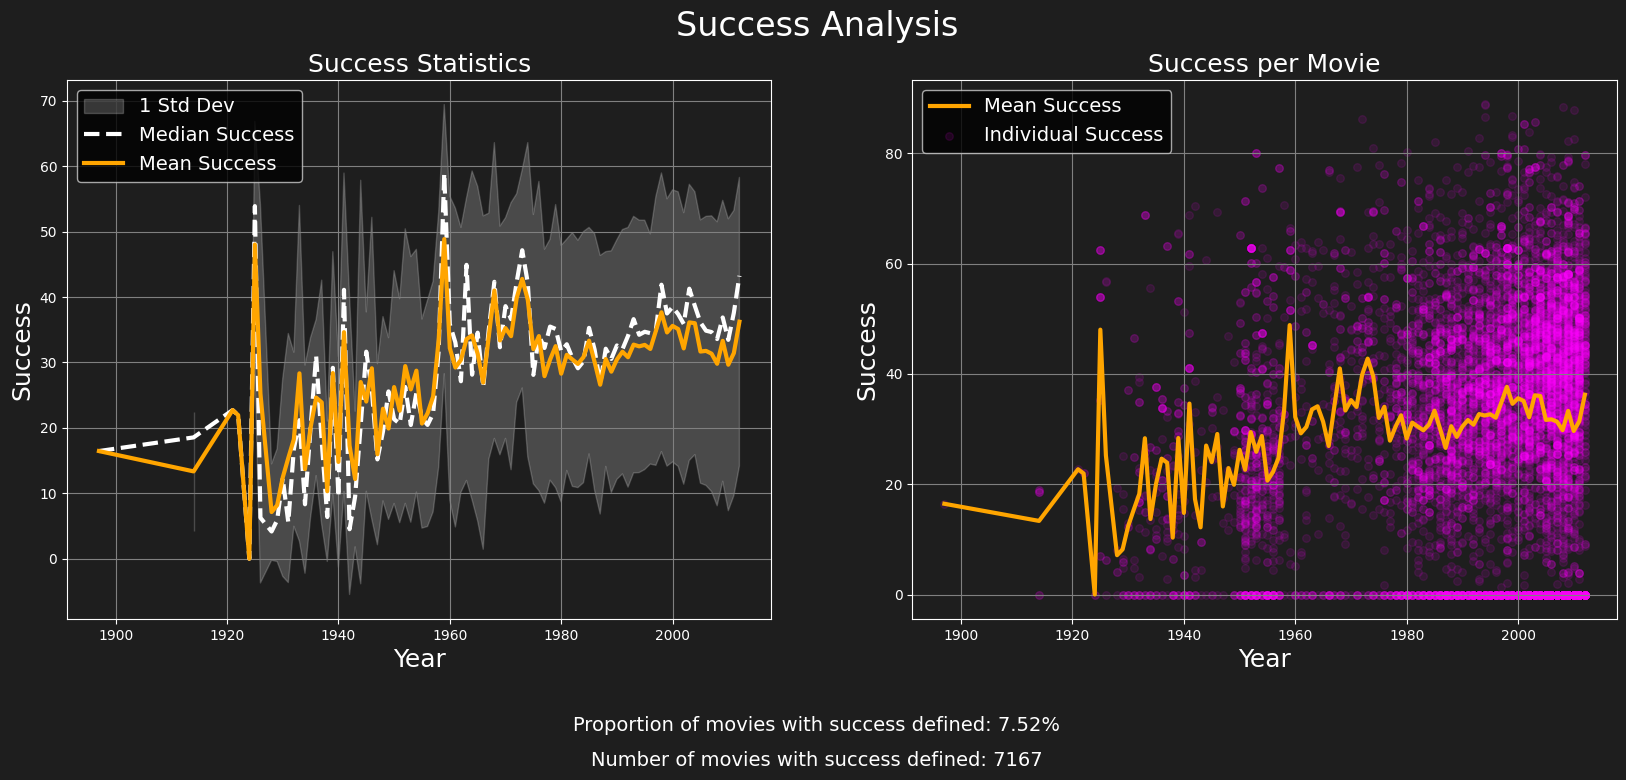

In [69]:
# Set the dark mode style
#plt.style.use('dark_background')
# Calculate the mean, median, std, min, and max success for each year
df_cleaned['success'] = df_cleaned.apply(calculate_success, axis=1)

# Filter out rows with NaN values in 'revenue' or 'success' and rows with 0 votes
df_filtered = df_cleaned.dropna(subset=['vote_count', 'success'])
success_stats = df_filtered[df_filtered['vote_count'] > 0]

success_stats = df_cleaned.groupby('year')['success'].agg(['mean', 'median', 'std', 'min', 'max'])




# Define the background color similar to VSCode's dark theme
background_color = '#1e1e1e'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)

# Main title
fig.suptitle('Success Analysis', fontsize=24, color='white')

# Plot 1
axes[0].fill_between(success_stats.index, success_stats['mean'] - success_stats['std'],
                     success_stats['mean'] + success_stats['std'], color='white', alpha=0.2, label='1 Std Dev')
axes[0].plot(success_stats.index, success_stats['median'], label='Median Success', linestyle='--', color='white', linewidth=3)
axes[0].plot(success_stats.index, success_stats['mean'], label='Mean Success', color='orange', linewidth=3)
axes[0].set_title('Success Statistics', fontsize=18, color='white')
axes[0].set_xlabel('Year', fontsize=18, color='white')
axes[0].set_ylabel('Success', fontsize=18, color='white')
axes[0].legend(fontsize=14, loc='upper left')
axes[0].grid(True, color='gray')

# Plot 2
axes[1].plot(success_stats.index, success_stats['mean'], label='Mean Success', color='orange', linewidth=3)
axes[1].scatter(df_cleaned['year'], df_cleaned['success'], color='magenta', alpha=0.1, label='Individual Success', s=30)
axes[1].set_title('Success per Movie', fontsize=18, color='white')
axes[1].set_xlabel('Year', fontsize=18, color='white')
axes[1].set_ylabel('Success', fontsize=18, color='white')
axes[1].legend(fontsize=14, loc='upper left')
axes[1].grid(True, color='gray')

# Set tick parameters
for ax in axes:
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

# Compute the proportion of movies that were plotted
total_movies_with_success = df_filtered.shape[0]
proportion_plotted = total_movies_with_success / movie_metadata_df.shape[0]
plt.figtext(0.5, -0.05, f"Proportion of movies with success defined: {proportion_plotted:.2%}", ha='center', fontsize=14, color='white')
plt.figtext(0.5, -0.10, f"Number of movies with success defined: {total_movies_with_success}", ha='center', fontsize=14, color='white')

plt.show()


### Revenue

The first factor to explore is revenue, as it is often a primary indicator of a movie’s commercial success.

By plotting the sum of movie revenues over time, we can get a sense of growth trends, but this analysis is biased due to a higher number of recent movies in the database. It’s unclear whether fewer movies were made in earlier years or if the dataset simply contains more recent entries. Additionally, this analysis doesn’t account for inflation, which affects the comparability of revenue figures across different time periods.

By analyzing the mean revenue over time, we observe spikes in certain decades, notably the 1960s, 1970s, 2000s, and around 2012, despite an overall upward trend. When using the median instead of the mean, these spikes appear even more pronounced, indicating periods of exceptionally high revenue for certain movies. Adjusting for inflation would likely amplify these spikes further, suggesting that some decades represent peaks of heightened interest or popularity in the film industry.

The variance in movie revenues has not remained constant over time, indicating a broader range of outcomes in recent years. This suggests an increasing variety of both high-grossing hits and low-performing flops, reflecting a more polarized landscape in the film industry. Over time, movies have become more variable in their success, likely due to factors like larger budgets for blockbusters, a growing number of independent films, and shifting audience preferences.

Revenue data shows distinct spikes of interest in movies across different decades, indicating varying peaks of popularity over time. However, relying on revenue alone to measure a movie’s success has limitations. Local successes in smaller countries with high popularity but lower revenue can be overlooked, and differences in purchasing power between rich and poor countries create disparities in revenue data. Additionally, without adjusting for inflation, revenue figures can misrepresent a movie’s true economic impact over time. Therefore, revenue alone is not a reliable indicator to fully explain a movie’s success. Other metrics should be considered for a more comprehensive understanding.

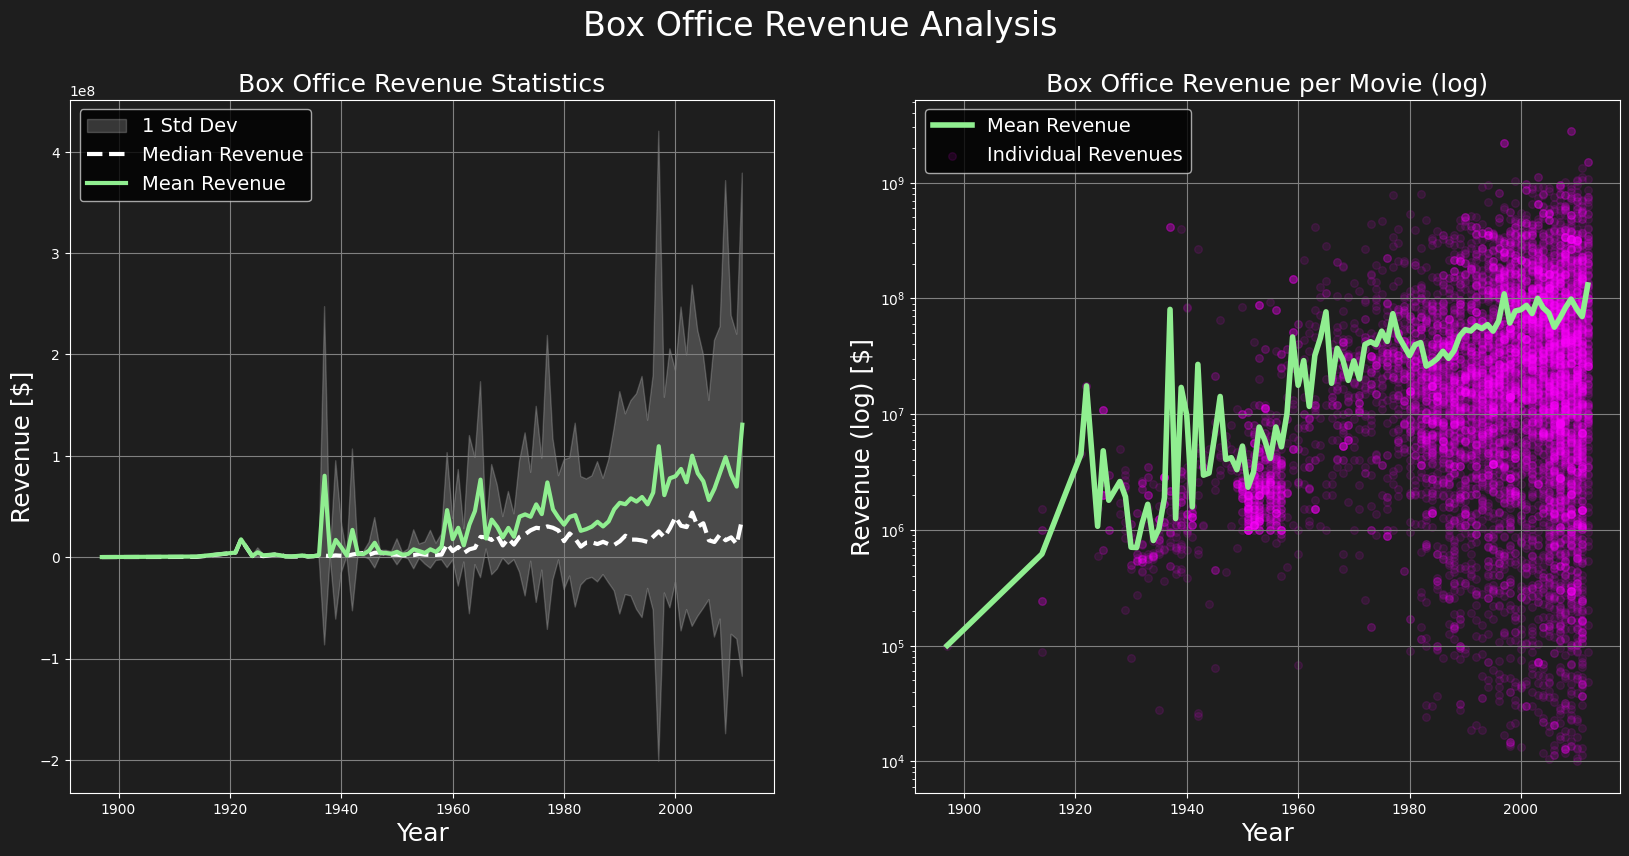

In [70]:


# Set the dark mode style
#plt.style.use('dark_background')

# Define the background color similar to VSCode's dark theme
background_color = '#1e1e1e'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)

# Main title
fig.suptitle('Box Office Revenue Analysis', fontsize=24, color='white')

# Plot 1
axes[0].fill_between(revenue_stats.index, revenue_stats['mean'] - revenue_stats['std'],
                     revenue_stats['mean'] + revenue_stats['std'], color='white', alpha=0.2, label='1 Std Dev')
axes[0].plot(revenue_stats.index, revenue_stats['median'], label='Median Revenue', linestyle='--', color='white', linewidth=3)
axes[0].plot(revenue_stats.index, revenue_stats['mean'], label='Mean Revenue', color='lightgreen', linewidth=3)
axes[0].set_title('Box Office Revenue Statistics', fontsize=18, color='white')
axes[0].set_xlabel('Year', fontsize=18, color='white')
axes[0].set_ylabel('Revenue [$]', fontsize=18, color='white')
axes[0].legend(fontsize=14)
axes[0].grid(True, color='gray')

# Plot 2
axes[1].plot(revenue_stats.index, revenue_stats['mean'], label='Mean Revenue', color='lightgreen', linewidth=4)
axes[1].scatter(df_cleaned['year'], df_cleaned['revenue'], color='magenta', alpha=0.1, label='Individual Revenues', s=30)
axes[1].set_title('Box Office Revenue per Movie (log)', fontsize=18, color='white')
axes[1].set_xlabel('Year', fontsize=18, color='white')
axes[1].set_ylabel('Revenue (log) [$]', fontsize=18, color='white')
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].legend(fontsize=14)
axes[1].grid(True, color='gray')

# Set tick parameters
for ax in axes:
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

plt.show()

#### Ratings correlations

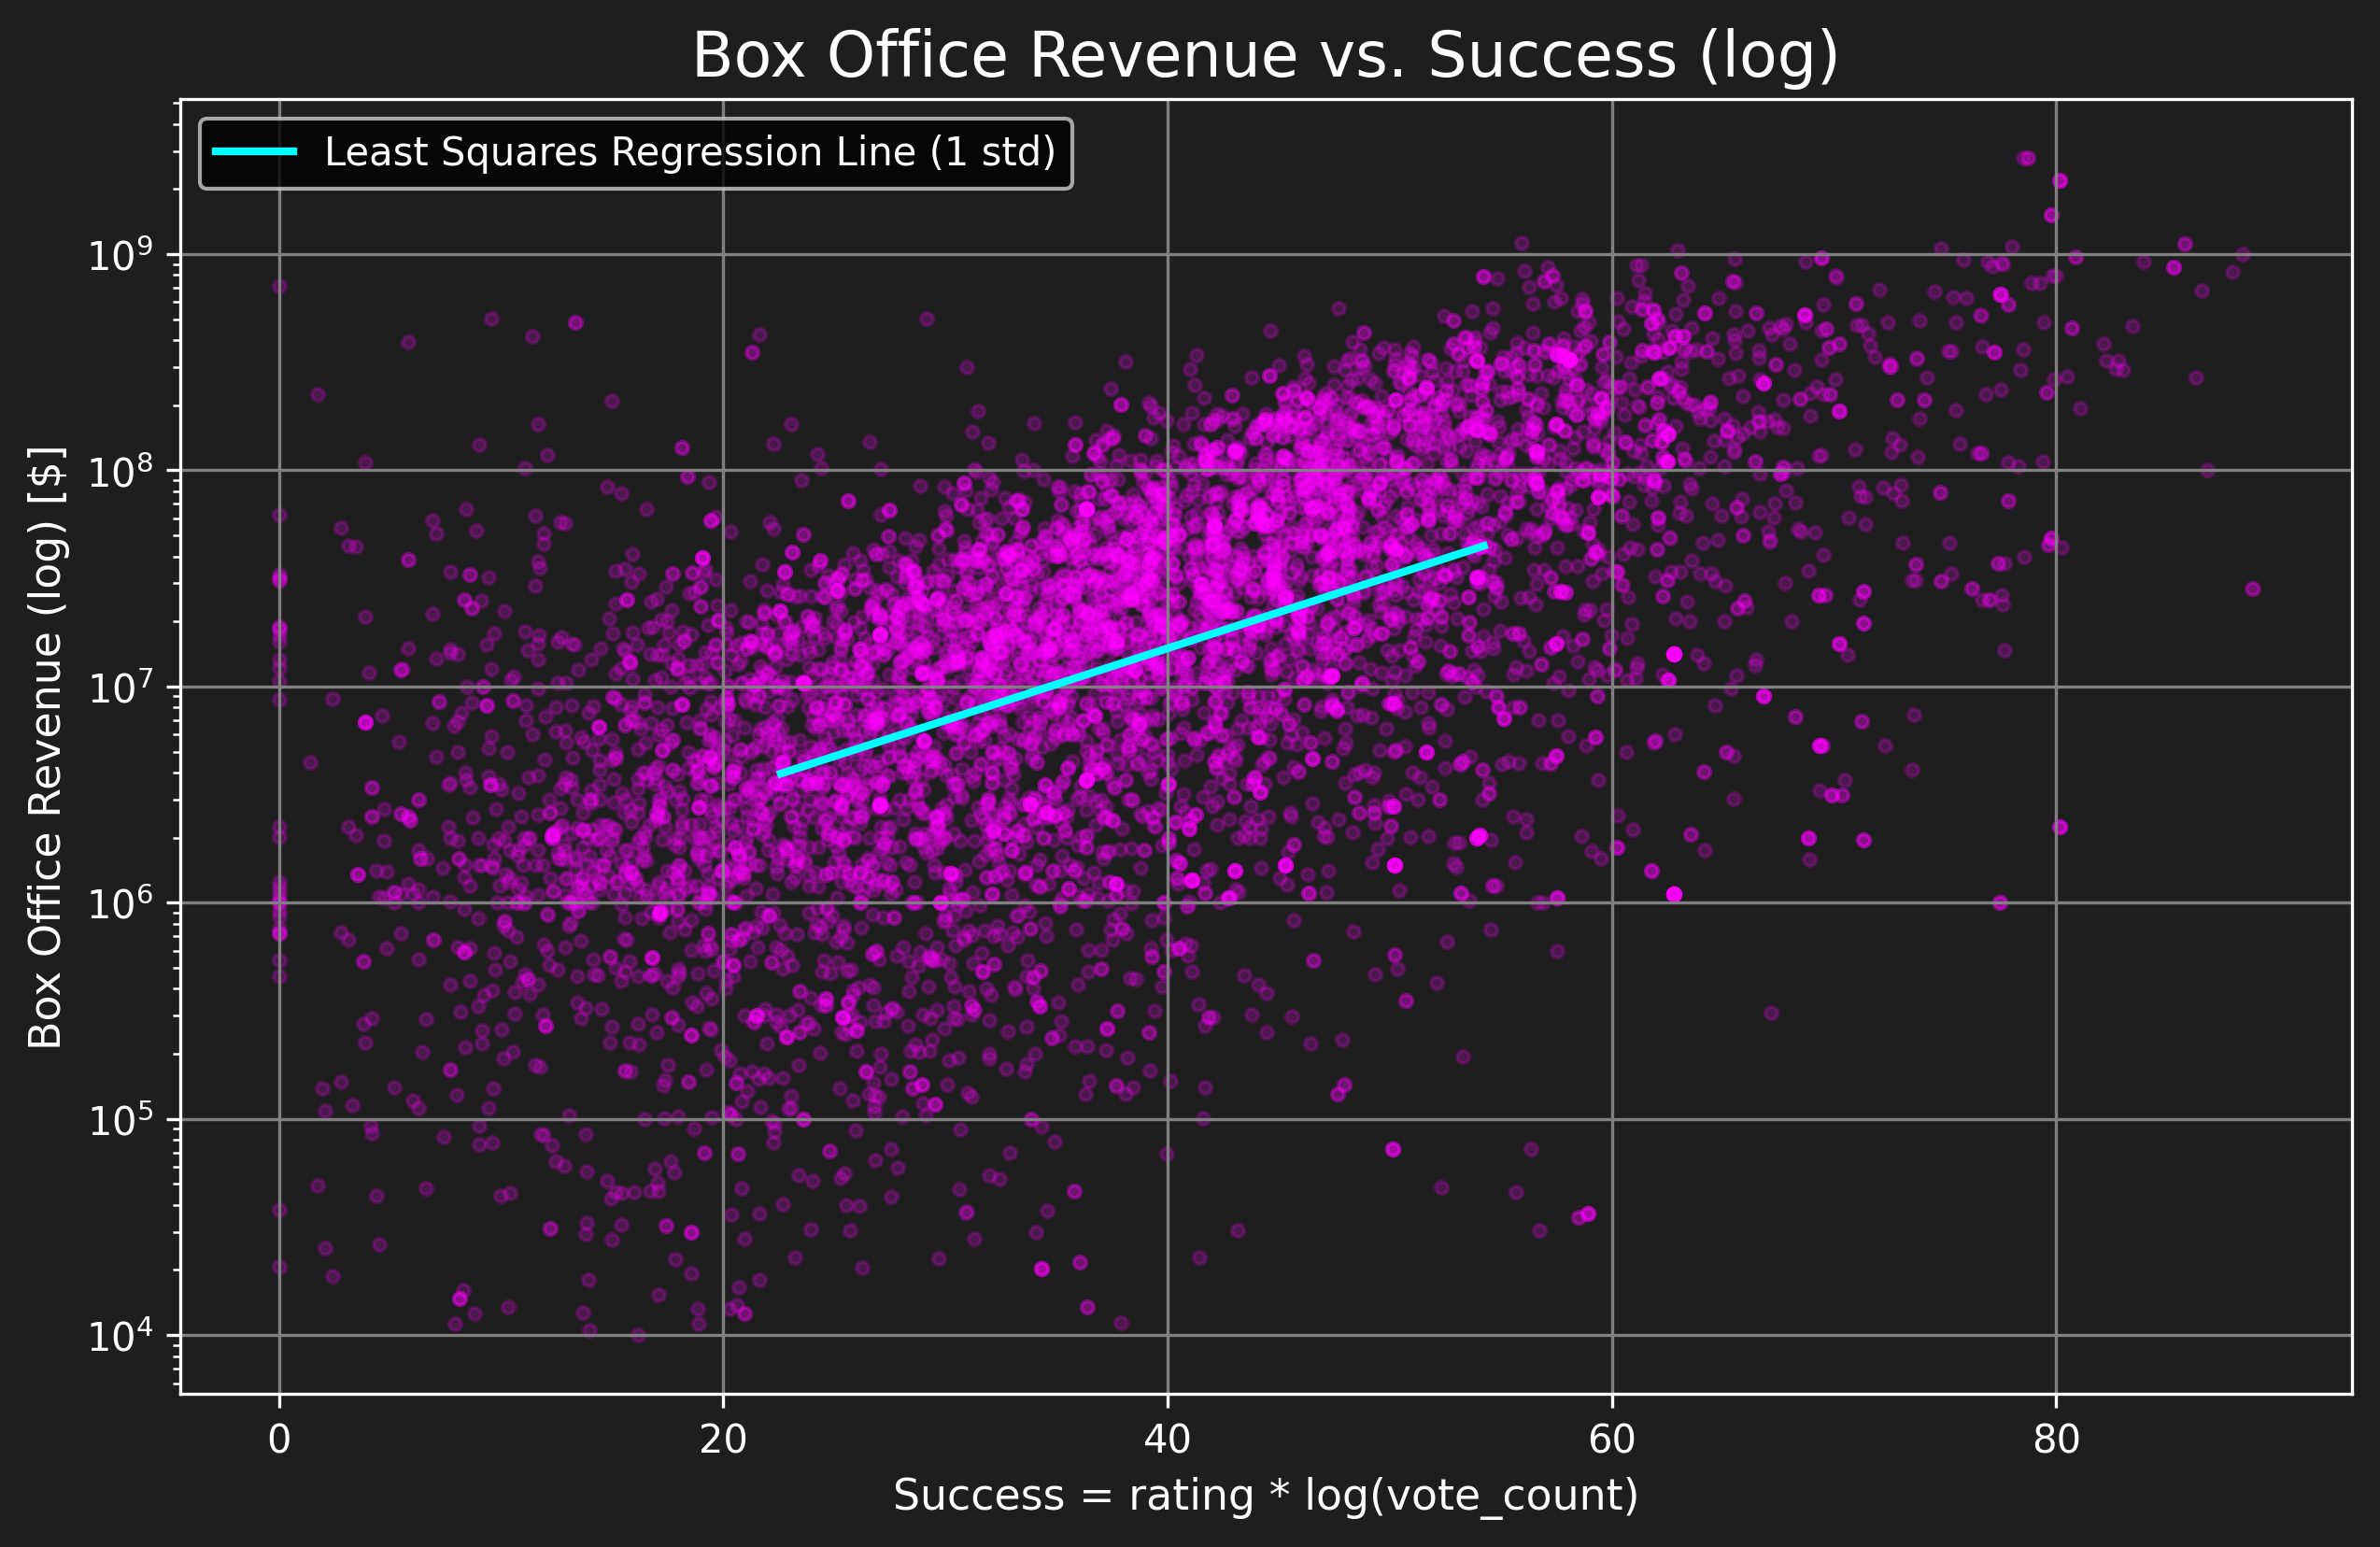

In [71]:
# Apply the success metric calculation to the dataframe
df_cleaned['success'] = df_cleaned.apply(calculate_success, axis=1)

# Filter out rows with NaN values in 'revenue' or 'success' and rows with 0 votes
df_filtered = df_cleaned.dropna(subset=['revenue', 'success'])
df_filtered = df_filtered[df_filtered['vote_count'] > 0]

# Set the dark mode style
plt.style.use('dark_background')

# Plot the box office revenue over success
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.patch.set_facecolor(background_color)  # Set the figure background color
ax.set_facecolor(background_color)  # Set the axes background color

# Scatter plot
ax.scatter(df_filtered['success'], df_filtered['revenue'], alpha=0.2, color='magenta', s=10)

# Fit a least squares regression line to the log-transformed revenue
log_revenue = np.log(df_filtered['revenue'])
coefficients = np.polyfit(df_filtered['success'], log_revenue, 1)
poly = np.poly1d(coefficients)

# Calculate mean and standard deviation of success
mean_success = df_filtered['success'].mean()
std_success = df_filtered['success'].std()

# Define x values for the regression line within 1 standard deviation
x = np.linspace(mean_success - std_success, mean_success + std_success, 100)
y = np.exp(poly(x))

# Plot the regression line
ax.plot(x, y, color='cyan', linewidth=2, label='Least Squares Regression Line (1 std)')

# Plot settings
ax.set_title('Box Office Revenue vs. Success (log)', fontsize=16, color='white')
ax.set_xlabel('Success = rating * log(vote_count)', fontsize=11, color='white')
ax.set_ylabel('Box Office Revenue (log) [$]', fontsize=11, color='white')
ax.set_yscale('log')
ax.grid(True, color='gray')
ax.legend()


plt.show()


#### Actors

Simple data on actors can be intresting when looking at their connections and prominence within the industry. For example, if we take the age of an actor, it seems more likely that the younger they started their career, the more connections they will have developed over time. Additionally, factors such as the number of movies an actor has participated in, the diversity of genres they have worked in, and their collaborations with other prominent actors could also be indicative of their influence and network within the industry.

By analyzing these variables, we aim to uncover patterns that highlight the significance of an actor's career trajectory and their impact on a movie's success. This analysis could provide valuable insights into how an actor's fame and industry connections contribute to the overall reception and performance of a film.

#### Actor's age

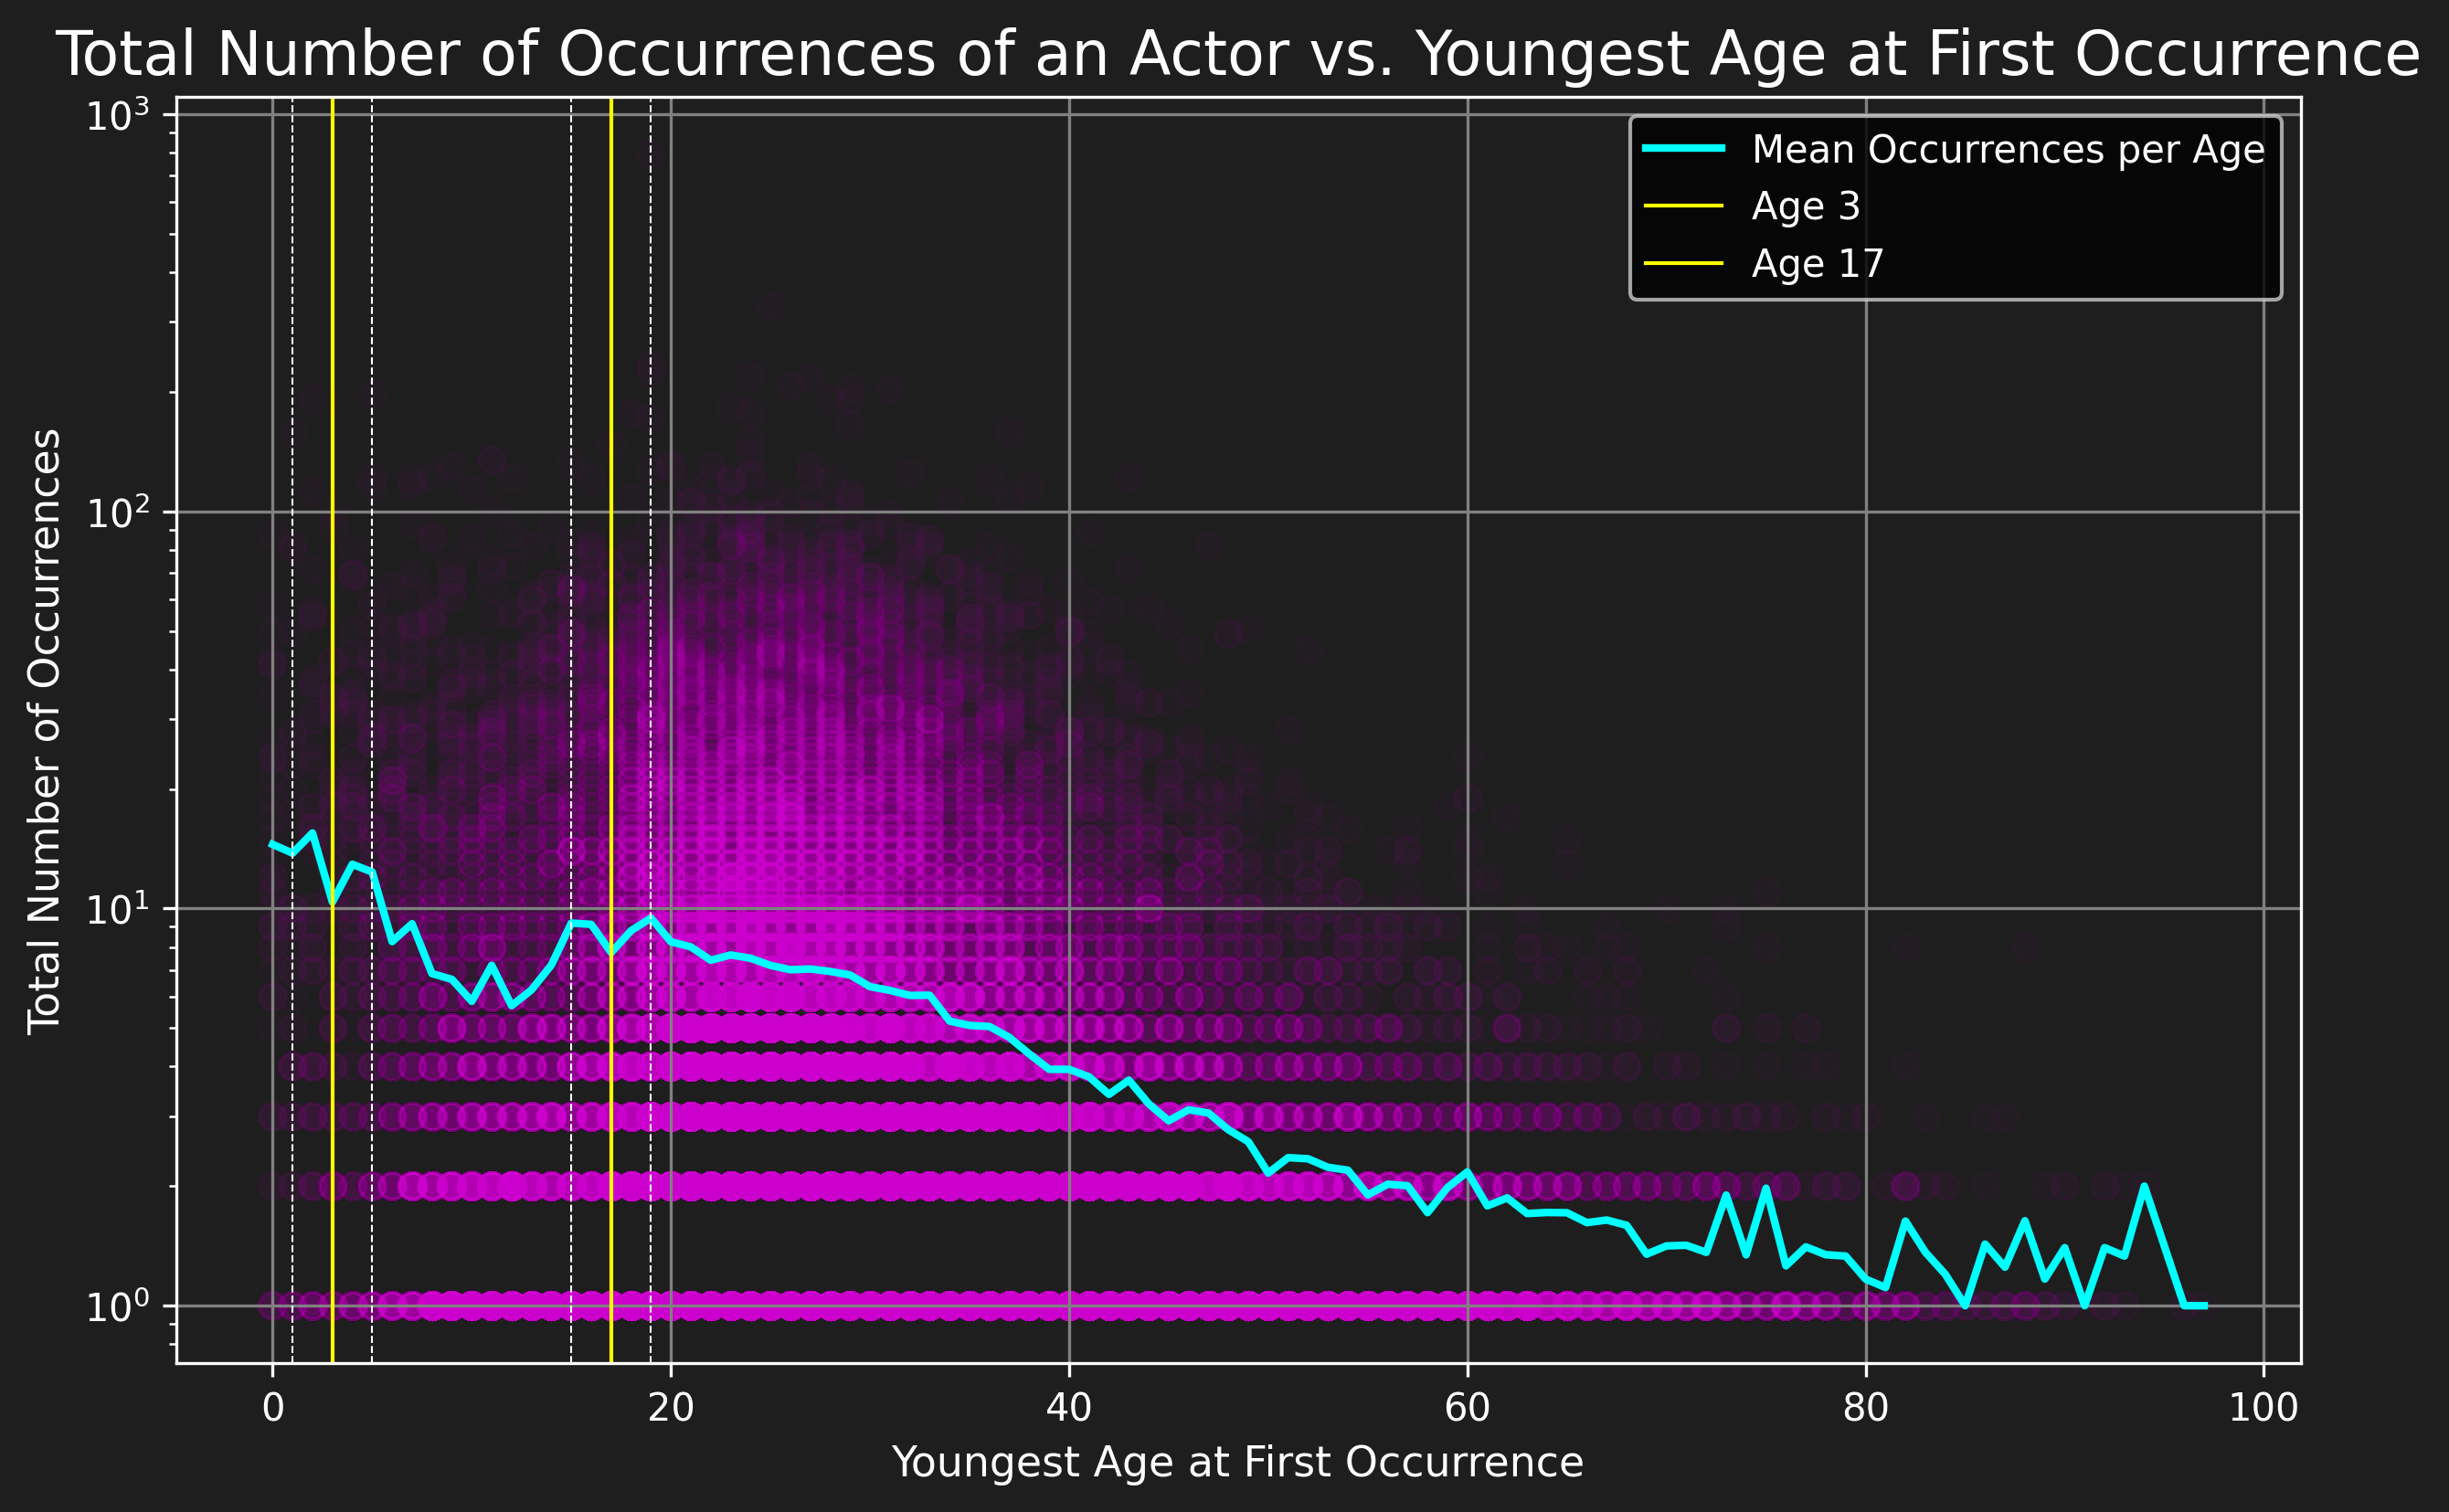

In [ ]:
# Calculate the total number of occurrences of each actor
actor_occurrences = character_metadata_df['actor_name'].value_counts()

# Calculate the youngest age at which each actor first appeared
youngest_age_first_occurrence = character_metadata_df.groupby('actor_name')['actor_age'].min()

# Merge the two series into a dataframe
actor_stats = pd.DataFrame({
    'total_occurrences': actor_occurrences,
    'youngest_age_first_occurrence': youngest_age_first_occurrence
}).dropna()

# Calculate the mean occurrences for each youngest age at first occurrence
mean_occurrences_per_age = actor_stats.groupby('youngest_age_first_occurrence')['total_occurrences'].mean()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.patch.set_facecolor(background_color)  # Set the figure background color
ax.set_facecolor(background_color)  # Set the axes background color

# Scatter plot
ax.scatter(actor_stats['youngest_age_first_occurrence'], actor_stats['total_occurrences'], alpha=0.02, color='magenta', s=50)

# Plot the mean occurrences per age
ax.plot(mean_occurrences_per_age.index, mean_occurrences_per_age.values, color='cyan', linewidth=2, label='Mean Occurrences per Age')

# Add vertical lines at ages 5 and 18
ax.axvline(x=1, color='white', linestyle='--', linewidth=0.5)
ax.axvline(x=3, color='yellow', linestyle='-', linewidth=1)
ax.axvline(x=5, color='white', linestyle='--', linewidth=0.5)

ax.axvline(x=19, color='white', linestyle='--', linewidth=0.5)
ax.axvline(x=15, color='white', linestyle='--', linewidth=0.5)
ax.axvline(x=17, color='yellow', linestyle='-', linewidth=1)

# Plot settings
ax.set_title('Total Number of Occurrences of an Actor vs. Youngest Age at First Occurrence', fontsize=16, color='white')
ax.set_xlabel('Youngest Age at First Occurrence', fontsize=11, color='white')
ax.set_ylabel('Total Number of Occurrences', fontsize=11, color='white')
ax.set_yscale('log')
ax.grid(True, color='gray')
ax.legend()

# Set tick parameters
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

There seems to be two interval of age where the likelyhood to appear in othe movies or to gain more experience is more likely: from 1 to 5 years old and from 15 to 19 years old. 
However, we can see an overall exponential decrease trend of apperance of actors with age. This means that the likelyhood of having an experienced actor is correlated to its age of beginning of career. The youngest, the more experienced it will become.

We believe that a famous actor participates to the success of a movie. Before analysing careers and connections of the actors we decided to simply take the most experienced actor that played in the movie, that means the actor that had most played in other movies until the release date of the movie in question. Below we plot for each movie the number of times the most experimented actor played before over the success of the movie.

In [109]:
!pip install tqdm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
from tqdm import tqdm

def actor_occurrences_up_to_date(actor_name, final_release_date):
    # Ensure the release_date column is in datetime format
    character_metadata_df['release_date'] = pd.to_datetime(character_metadata_df['release_date'], errors='coerce')
    
    # Check if the actor exists in the dataset
    if actor_name not in character_metadata_df['actor_name'].values:
        raise ValueError(f"Actor '{actor_name}' not found in the dataset.")
    
    # Filter the dataframe for the given actor and release dates up to the final_release_date
    filtered_df = character_metadata_df[(character_metadata_df['actor_name'] == actor_name) & 
                                        (character_metadata_df['release_date'] <= final_release_date) & 
                                        (character_metadata_df['release_date'].notna())]
    
    # Return the number of occurrences
    return filtered_df.shape[0]

def max_actor_occurrences_per_movie(character_metadata_df, movie_metadata_df):
    max_occurrences_dict = {}
    
    # Filter movies with available box office revenue
    movies_with_revenue = movie_metadata_df.dropna(subset=['revenue'])
    limited_movies = movies_with_revenue[['movie_id', 'release_date']].drop_duplicates().head(40000)
    
    # Iterate through each movie with a progress bar
    for movie_id, release_date in tqdm(limited_movies.values, desc="Processing movies"):
        # Skip rows with NaN release_date
        if pd.isna(release_date):
            continue
        
        # Filter the dataframe for the current movie
        actors_in_movie = character_metadata_df[character_metadata_df['movie_id'] == movie_id]['actor_name'].dropna()
        
        # Initialize the maximum occurrences for the current movie
        max_occurrences = 0
        
        # Iterate through each actor in the current movie
        for actor in actors_in_movie:
            # Get the number of occurrences of the actor up to the movie's release date
            occurrences = actor_occurrences_up_to_date(actor, release_date)
            # Update the maximum occurrences if the current actor's occurrences are higher
            if occurrences > max_occurrences:
                max_occurrences = occurrences
        
        # Store the maximum occurrences for the current movie
        max_occurrences_dict[movie_id] = max_occurrences
    
    # Convert the dictionary to a pandas Series for easier manipulation and display
    max_occurrences_series = pd.Series(max_occurrences_dict, name='max_actor_occurrences')
    
    return max_occurrences_series

# Example usage
max_actor_occurrences_series = max_actor_occurrences_per_movie(character_metadata_df, movie_metadata_df)
print(max_actor_occurrences_series)


Processing movies: 0it [00:00, ?it/s]

Series([], Name: max_actor_occurrences, dtype: object)


In [124]:
# Ensure the indices match between movie_metadata_df and max_actor_occurrences_series
movie_metadata_df = movie_metadata_df[movie_metadata_df['movie_id'].isin(max_actor_occurrences_series.index)]
max_actor_occurrences_series = max_actor_occurrences_series[max_actor_occurrences_series.index.isin(movie_metadata_df['movie_id'])]

# Check if the vectors are non-empty
if not movie_metadata_df.empty and not max_actor_occurrences_series.empty:
    # Plot the max occurrences over box office revenue
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    fig.patch.set_facecolor(background_color)  # Set the figure background color
    ax.set_facecolor(background_color)  # Set the axes background color

    # Scatter plot
    ax.scatter(max_actor_occurrences_series, movie_metadata_df['revenue'], alpha=0.2, color='magenta', s=10)

    # Plot settings
    ax.set_title('Max Actor Occurrences vs. Box Office Revenue', fontsize=16, color='white')
    ax.set_xlabel('Max Actor Occurrences', fontsize=11, color='white')
    ax.set_ylabel('Box Office Revenue [$]', fontsize=11, color='white')
    ax.set_yscale('log')
    ax.grid(True, color='gray')

    plt.show()
else:
    print("The vectors for max actor occurrences and box office revenue are empty.")

The vectors for max actor occurrences and box office revenue are empty.


In [123]:
# Set the dark mode style
plt.style.use('dark_background')

# Ensure the indices match between df_filtered and max_actor_occurrences_series
df_filtered = df_filtered[df_filtered.index.isin(max_actor_occurrences_series.index)]
max_actor_occurrences_series = max_actor_occurrences_series[max_actor_occurrences_series.index.isin(df_filtered.index)]

# Check if the vectors are non-empty
if not df_filtered.empty and not max_actor_occurrences_series.empty:
	# Plot the max occurrences over success
	fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
	fig.patch.set_facecolor(background_color)  # Set the figure background color
	ax.set_facecolor(background_color)  # Set the axes background color

	# Scatter plot
	ax.scatter(df_filtered['success'], max_actor_occurrences_series, alpha=0.2, color='magenta', s=10)

	# Fit a least squares regression line to the max occurrences
	coefficients = np.polyfit(df_filtered['success'], max_actor_occurrences_series, 1)
	poly = np.poly1d(coefficients)

	# Calculate mean and standard deviation of success
	mean_success = df_filtered['success'].mean()
	std_success = df_filtered['success'].std()

	# Define x values for the regression line within 1 standard deviation
	x = np.linspace(mean_success - std_success, mean_success + std_success, 100)
	y = poly(x)

	# Plot the regression line
	ax.plot(x, y, color='cyan', linewidth=2, label='Least Squares Regression Line (1 std)')

	# Plot settings
	ax.set_title('Max Actor Occurrences vs. Success', fontsize=16, color='white')
	ax.set_xlabel('Success = rating * log(vote_count)', fontsize=11, color='white')
	ax.set_ylabel('Max Actor Occurrences', fontsize=11, color='white')
	ax.grid(True, color='gray')
	ax.legend()

	plt.show()
else:
	print("The vectors for success and max actor occurrences are empty.")

The vectors for success and max actor occurrences are empty.


Reviews are another crucial factor to consider when analyzing a movie’s performance or popularity. User reviews, critical ratings, and audience feedback can provide valuable insights into how well a movie resonates with its audience. Positive reviews often correlate with higher viewer engagement, word-of-mouth promotion, and overall success, both in box office earnings and long-term streaming or sales. Conversely, negative reviews can significantly impact a movie's reception, leading to lower viewership and reduced revenue. Incorporating review data into the analysis allows for a more comprehensive understanding of a movie's success, as it combines financial metrics with audience sentiment, providing a fuller picture of its overall impact in the entertainment industry.

............................................................................................
(to do when we have the data)

In [ ]:
### 2.3 Sucess Metric Selection

We define the success metric 

S = ratings * log(number of vote)

effectively combines both the quality and popularity of a movie into a single value. By multiplying the average rating with the logarithm of the number of votes, it ensures that movies with higher ratings and a significant number of votes are given appropriate weight. This metric is particularly useful because ratings tend to follow a Gaussian distribution, with most movies clustering around the middle, while the number of votes often follows a log-normal distribution. The logarithmic adjustment of vote count helps balance the influence of highly-voted movies without letting them disproportionately skew the results. Overall, this approach provides a fair and comprehensive evaluation of a movie's success, capturing both its quality and its widespread appeal.

# 3. Sentiment Analysis

### 3.1 Choice of Model

### 3.2 Sentence Segmentation & Sentiment Scoring

### 3.3 Planned Analysis (to do)

# 4. Network Analysis

### 4.1 Actor Network Visualization

### 4.2  Planned Analysis (to do)

# 5. Results and Interpretations (to do)